# E2a: Küchentischversuch zum Laval-Rotor

Name: Vincent Jestädt 
Datum: 10.01.24 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:
-mit welchen Beschleunigungen schwingen die gewählten Haushaltsgegenstände JBL-Musikbox und Massage-Pistole?
-können mittels Fourier-Transformation die Frequenzen der Schwingung bestimmmt werden?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="images/versuch1.jpg" width="500">

- Beschreibung des Aufbaus: -der Beschleunigungssensor wurde mittels Klebestreifen auf einer JBL-Musikbox fixiert
                            -die JBL-Box wurde daraufhin per Bluetooth mit dem Rechner verbunden
- Vorgangsbeschreibung: -es wurde ein Techno-Lied über die Musikbox gestartet
                        -die Messung nahm 20 Sekunden die Beschleunigungen des Sensors auf 

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata
from functions.m_operate import prepare_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft


path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240111_153521_YourNameWithoutWhiteSpaces_speaker" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240111_153521_YourNameWithoutWhiteSpaces_speaker.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end


In [3]:
"""Prepare Metadata"""

(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240111_153521_YourNameWithoutWhiteSpaces_speaker/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240111_153521_YourNameWithoutWhiteSpaces_speaker/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240111_153521_YourNameWithoutWhiteSpaces_speaker/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaed49-35bd-6865-857f-3dd00e7888bb": {
    "type": "probe",
    "name": "speaker",
    "

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:

# Vollständigen Pfad zur HDF5-Datei erstellen
h5_file_path = os.path.join(path_measurement_folder, h5_file_name)
    
    
# UUID des Beschleunigungssensors
acceleration_sensor_uuid = '1ee847be-fddd-6ee4-892a-68c4555b0981'

# Öffnen der HDF5-Datei im Lese-Modus
with h5py.File(h5_file_path, 'r') as hdf_file:
    # Überprüfen, ob die UUID des Sensors vorhanden ist
    if acceleration_sensor_uuid in hdf_file:
        # Zugriff auf die Sensorgruppe
        sensor_group = hdf_file[acceleration_sensor_uuid]

        # Auslesen der Datenreihen
        acceleration_x = np.array(sensor_group['acceleration_x'])
        acceleration_y = np.array(sensor_group['acceleration_y'])
        acceleration_z = np.array(sensor_group['acceleration_z'])
        timestamp = np.array(sensor_group['timestamp'])
        print("Auslese erfolgreich")
    else:
        print("Auslese nicht erfolgreich")
        
# Anzeigen der Arrays
print("Beschleunigung X:")
print(acceleration_x)

print("Beschleunigung Y:")
print(acceleration_y)

print("Beschleunigung Z:")
print(acceleration_z)

print("Zeitstempel:")
print(timestamp)



Auslese erfolgreich
Beschleunigung X:
[0.        0.        0.7453054 ... 0.9022118 0.9022118 0.9022118]
Beschleunigung Y:
[  0.          0.         -9.5712904 ... -10.2381426 -10.2381426
 -10.002783 ]
Beschleunigung Z:
[0.        0.        1.8044236 ... 1.6867438 1.6867438 1.765197 ]
Zeitstempel:
[3.47805023e-03 8.32748413e-03 1.29659176e-02 ... 1.99943781e+01
 1.99987988e+01 2.00031645e+01]


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
vec_am = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


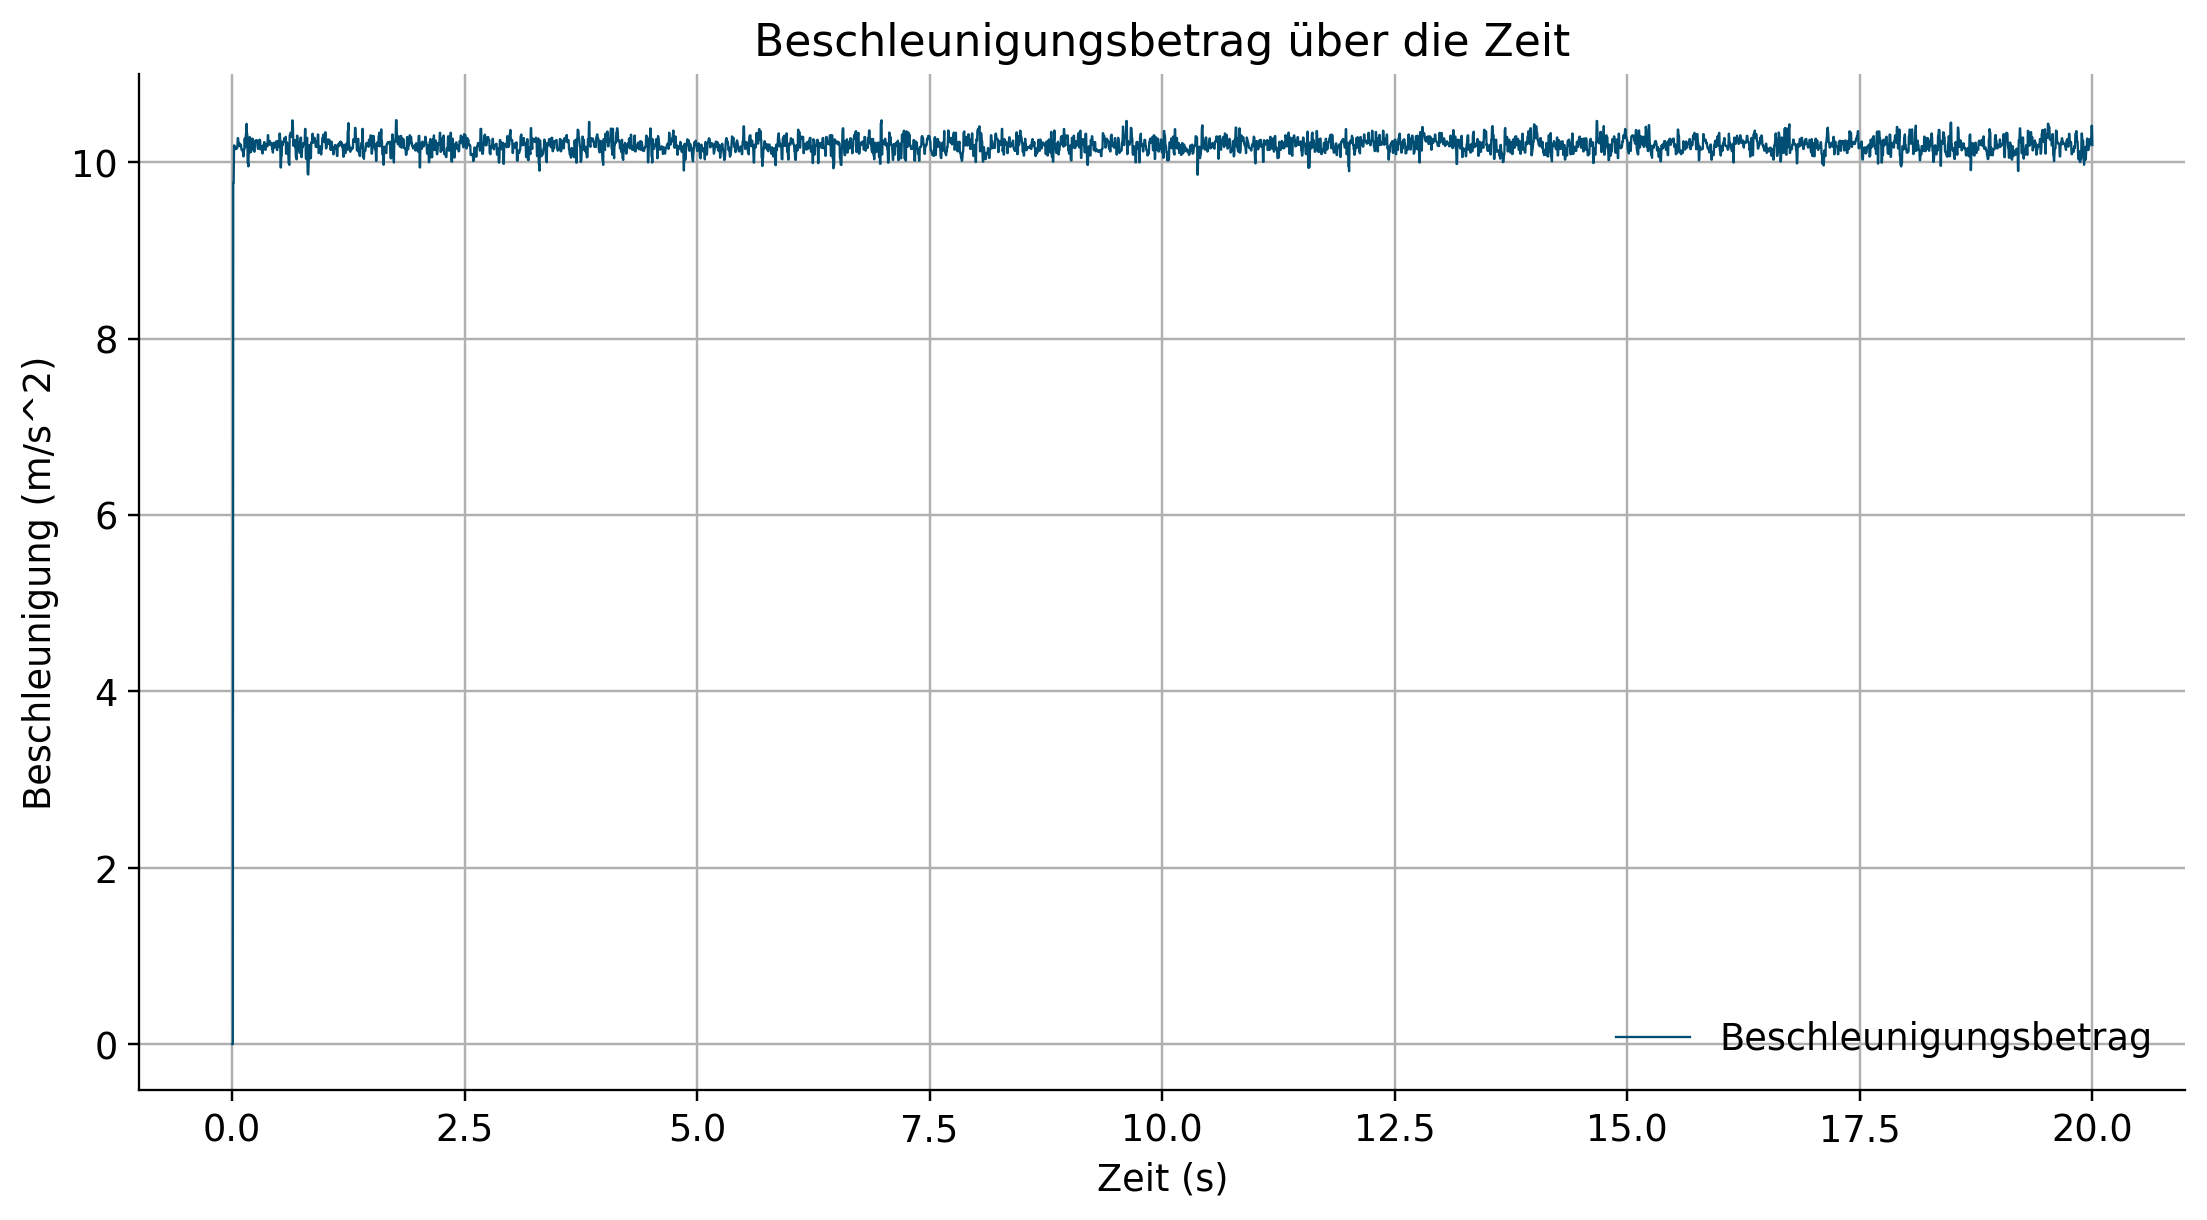

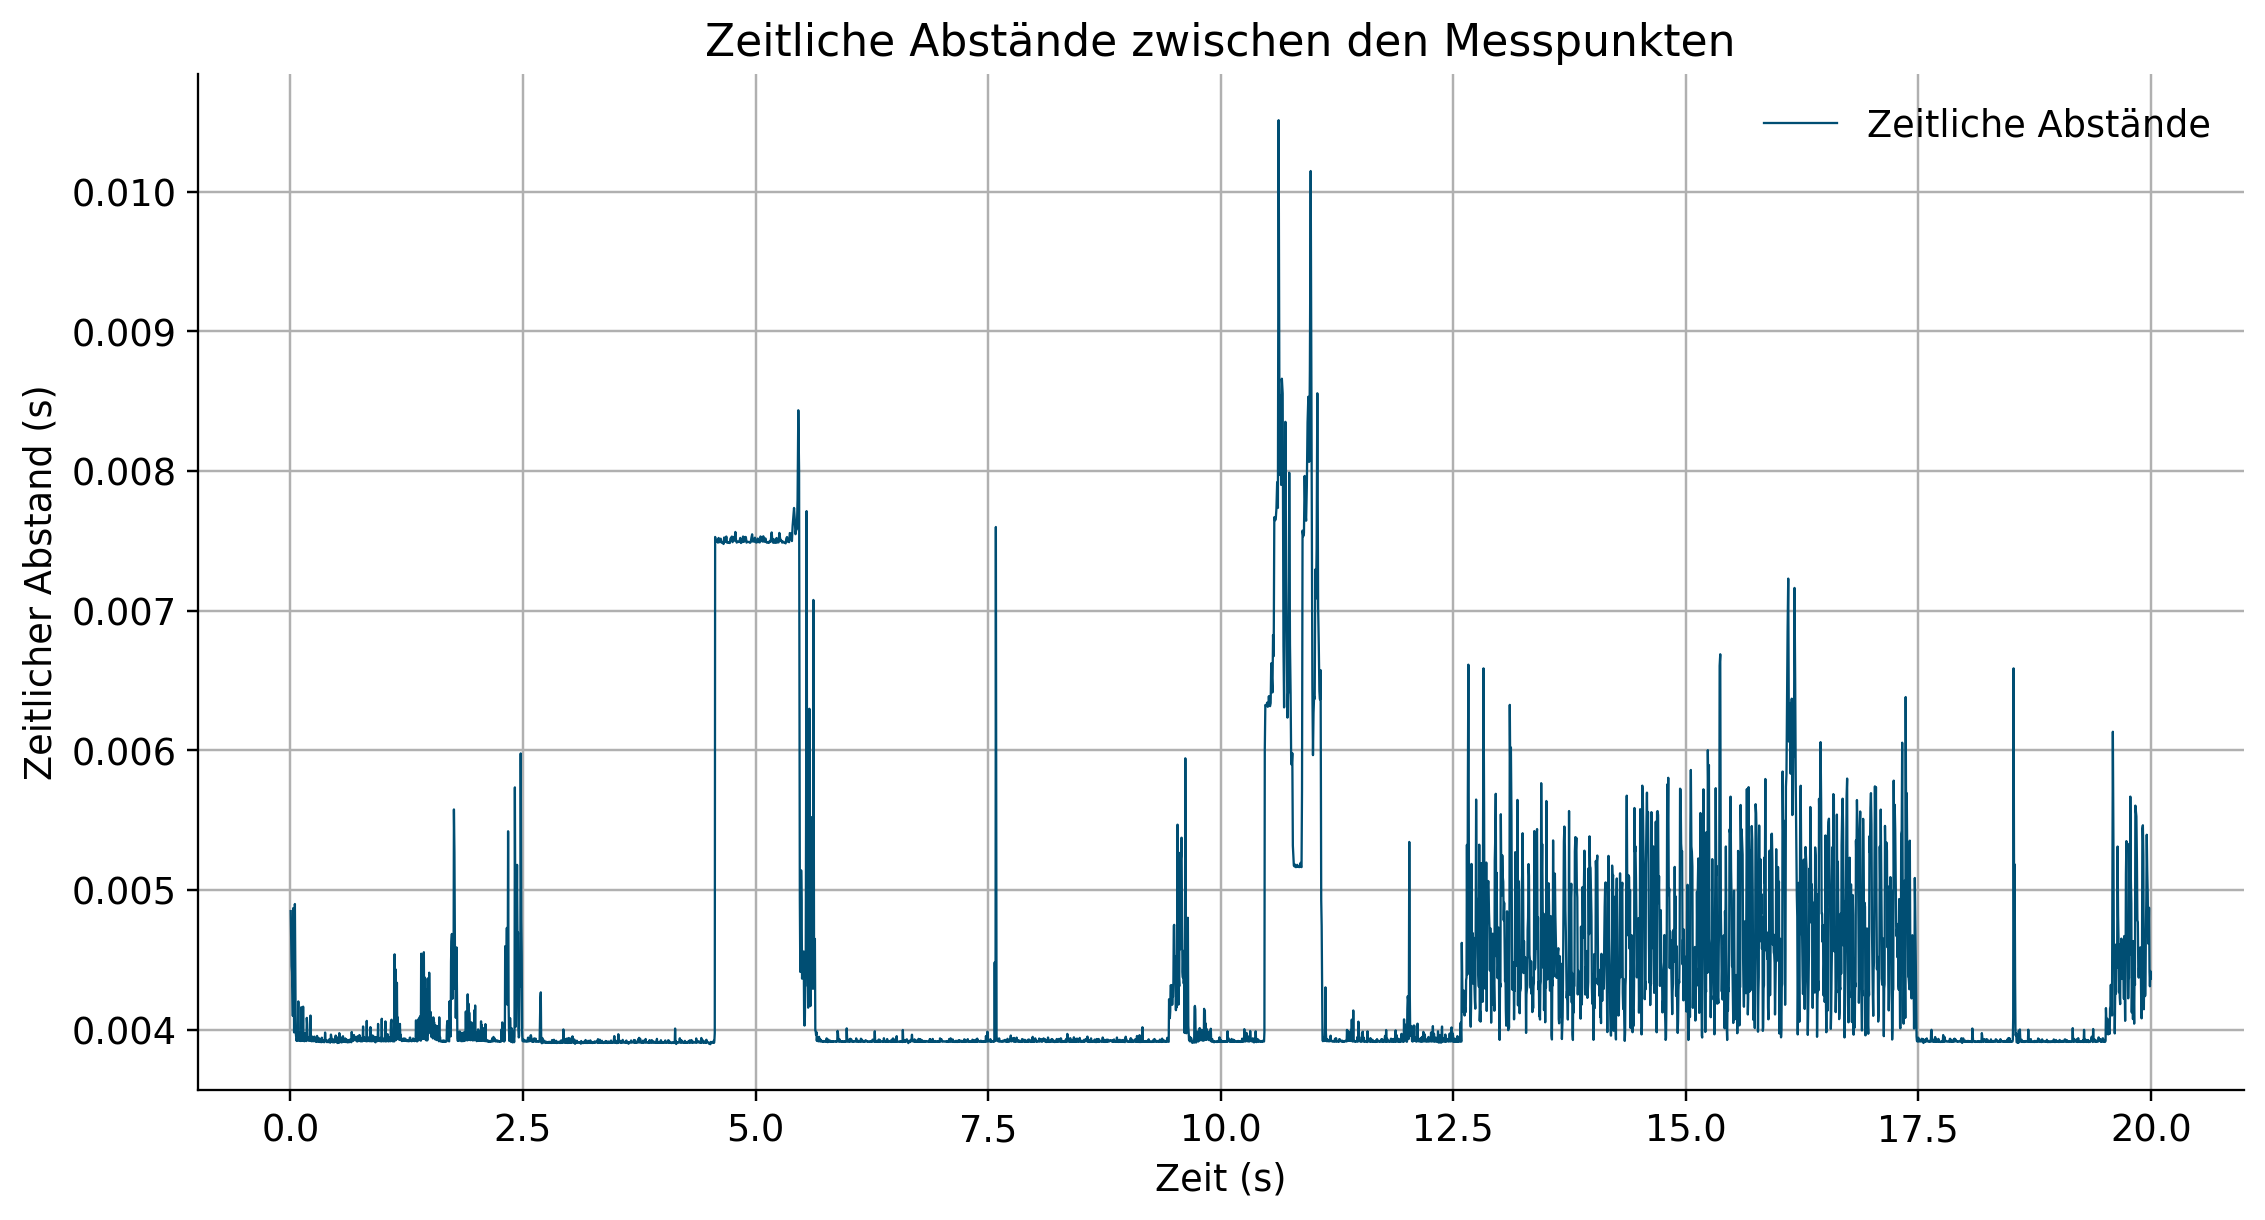

In [6]:
# Berechnen der zeitlichen Abstände zwischen den Messpunkten
time_intervals = np.diff(timestamp)

# Plot der Beträge der Beschleunigung über die Zeit
plt.figure(figsize=(12, 6))
plt.plot(timestamp, vec_am, label='Beschleunigungsbetrag')
plt.title('Beschleunigungsbetrag über die Zeit')
plt.xlabel('Zeit (s)')
plt.ylabel('Beschleunigung (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

# Plot der zeitlichen Abstände zwischen den Messpunkten
plt.figure(figsize=(12, 6))
plt.plot(timestamp[:-1], time_intervals, label='Zeitliche Abstände')
plt.title('Zeitliche Abstände zwischen den Messpunkten')
plt.xlabel('Zeit (s)')
plt.ylabel('Zeitlicher Abstand (s)')
plt.legend()
plt.grid(True)
plt.show()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

Interpolierte Daten:
[ 0.          0.          7.8059234  ... 10.41530867 10.4109311
 10.19733173]


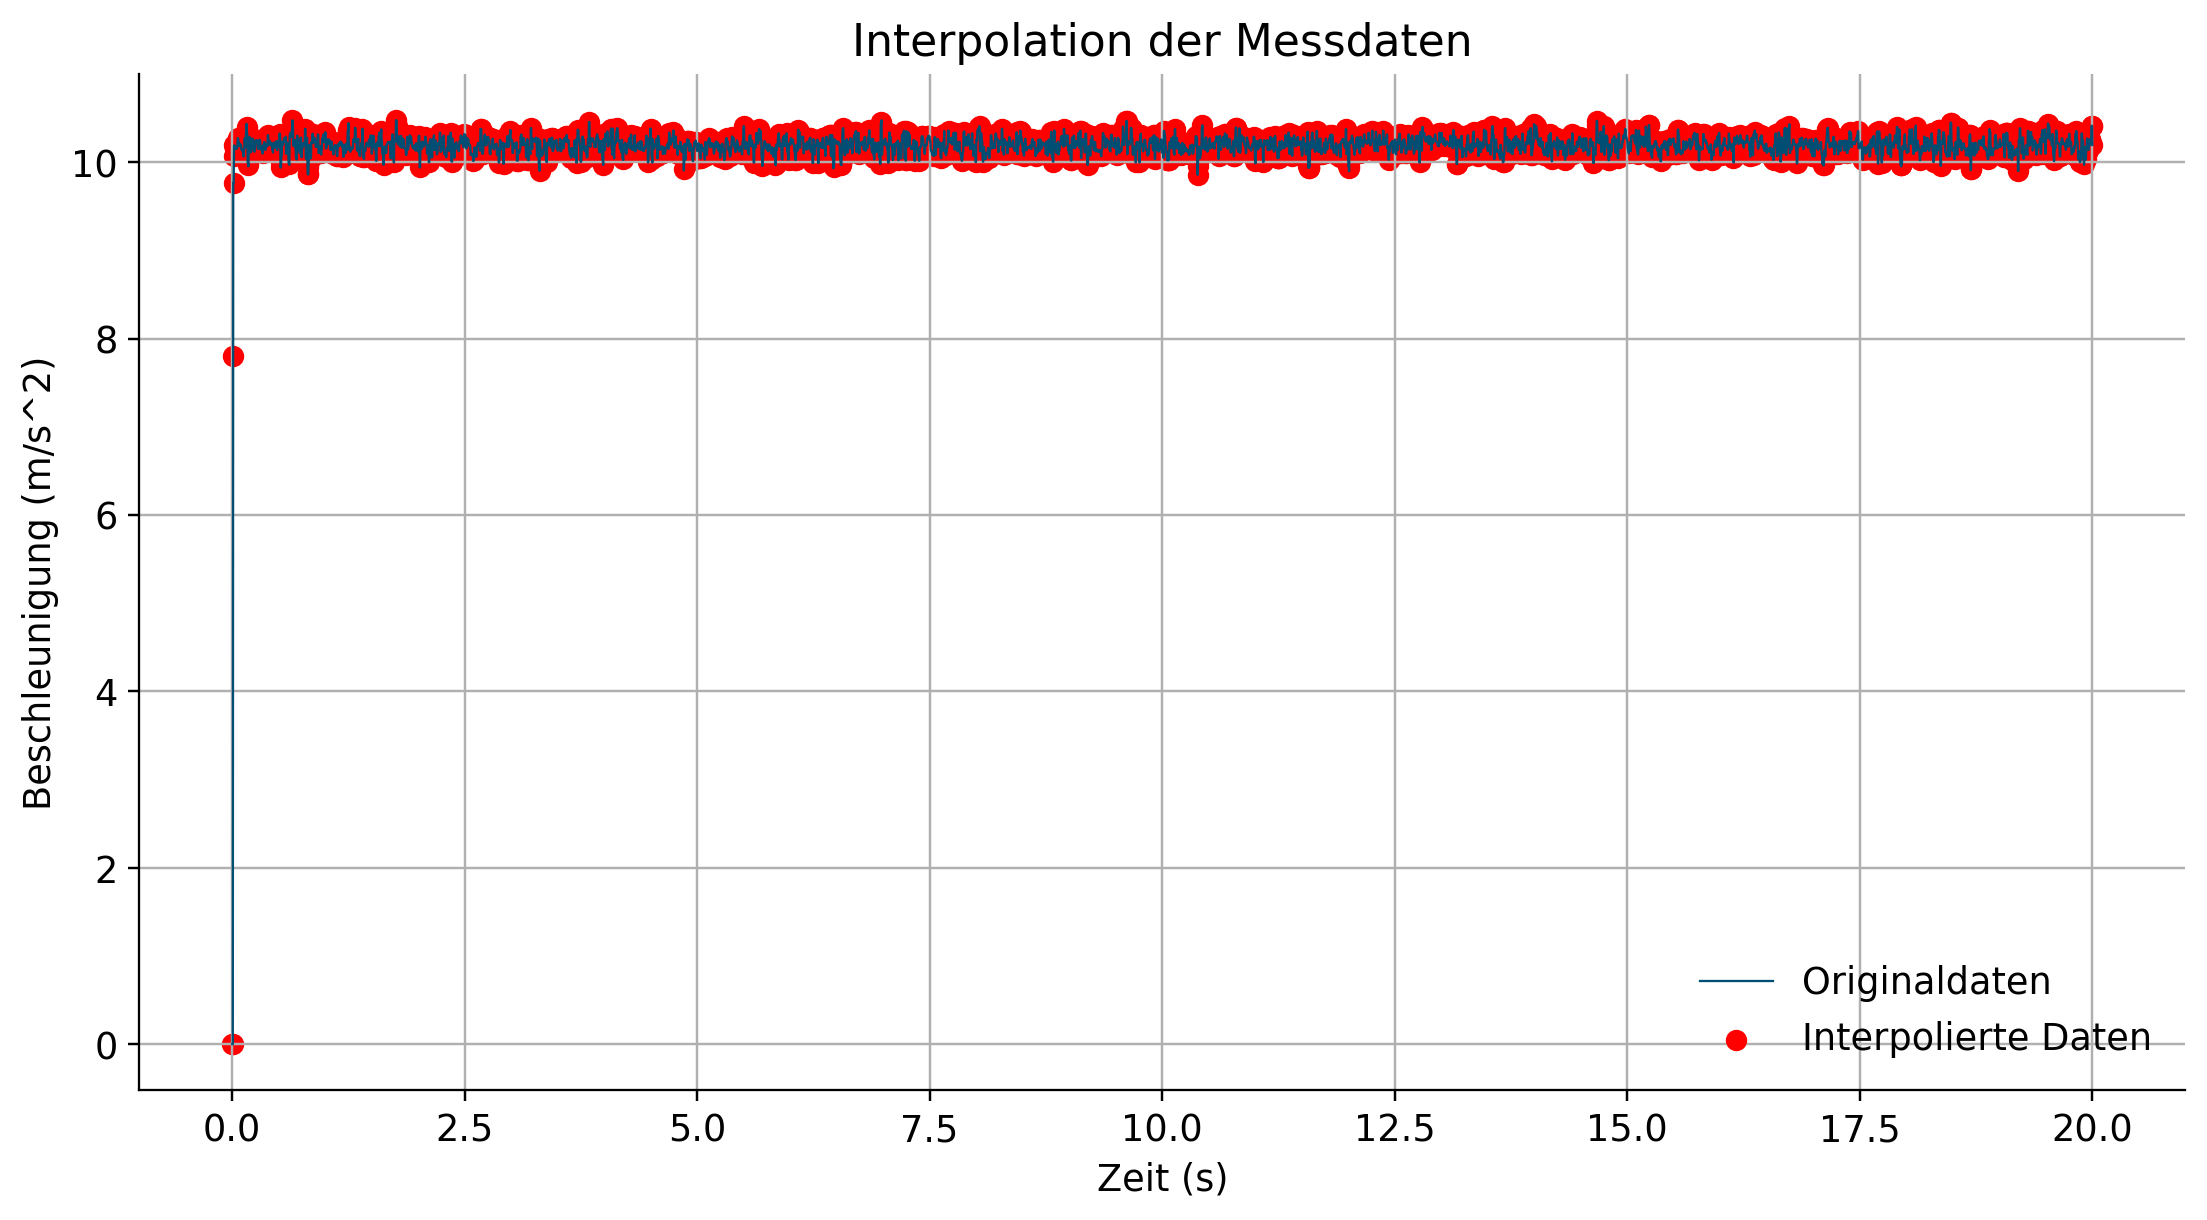

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
# Aufruf der interpolation-Funktion
new_time, interpolated_data = interpolation(timestamp, vec_am)

# Ausgabe der interpolierten Daten
print("Interpolierte Daten:")
print(interpolated_data)

# Plot der Originaldaten
plt.figure(figsize=(12, 6))
plt.plot(timestamp, vec_am, label='Originaldaten')
plt.scatter(new_time, interpolated_data, color='red', label='Interpolierte Daten')
plt.title('Interpolation der Messdaten')
plt.xlabel('Zeit (s)')
plt.ylabel('Beschleunigung (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

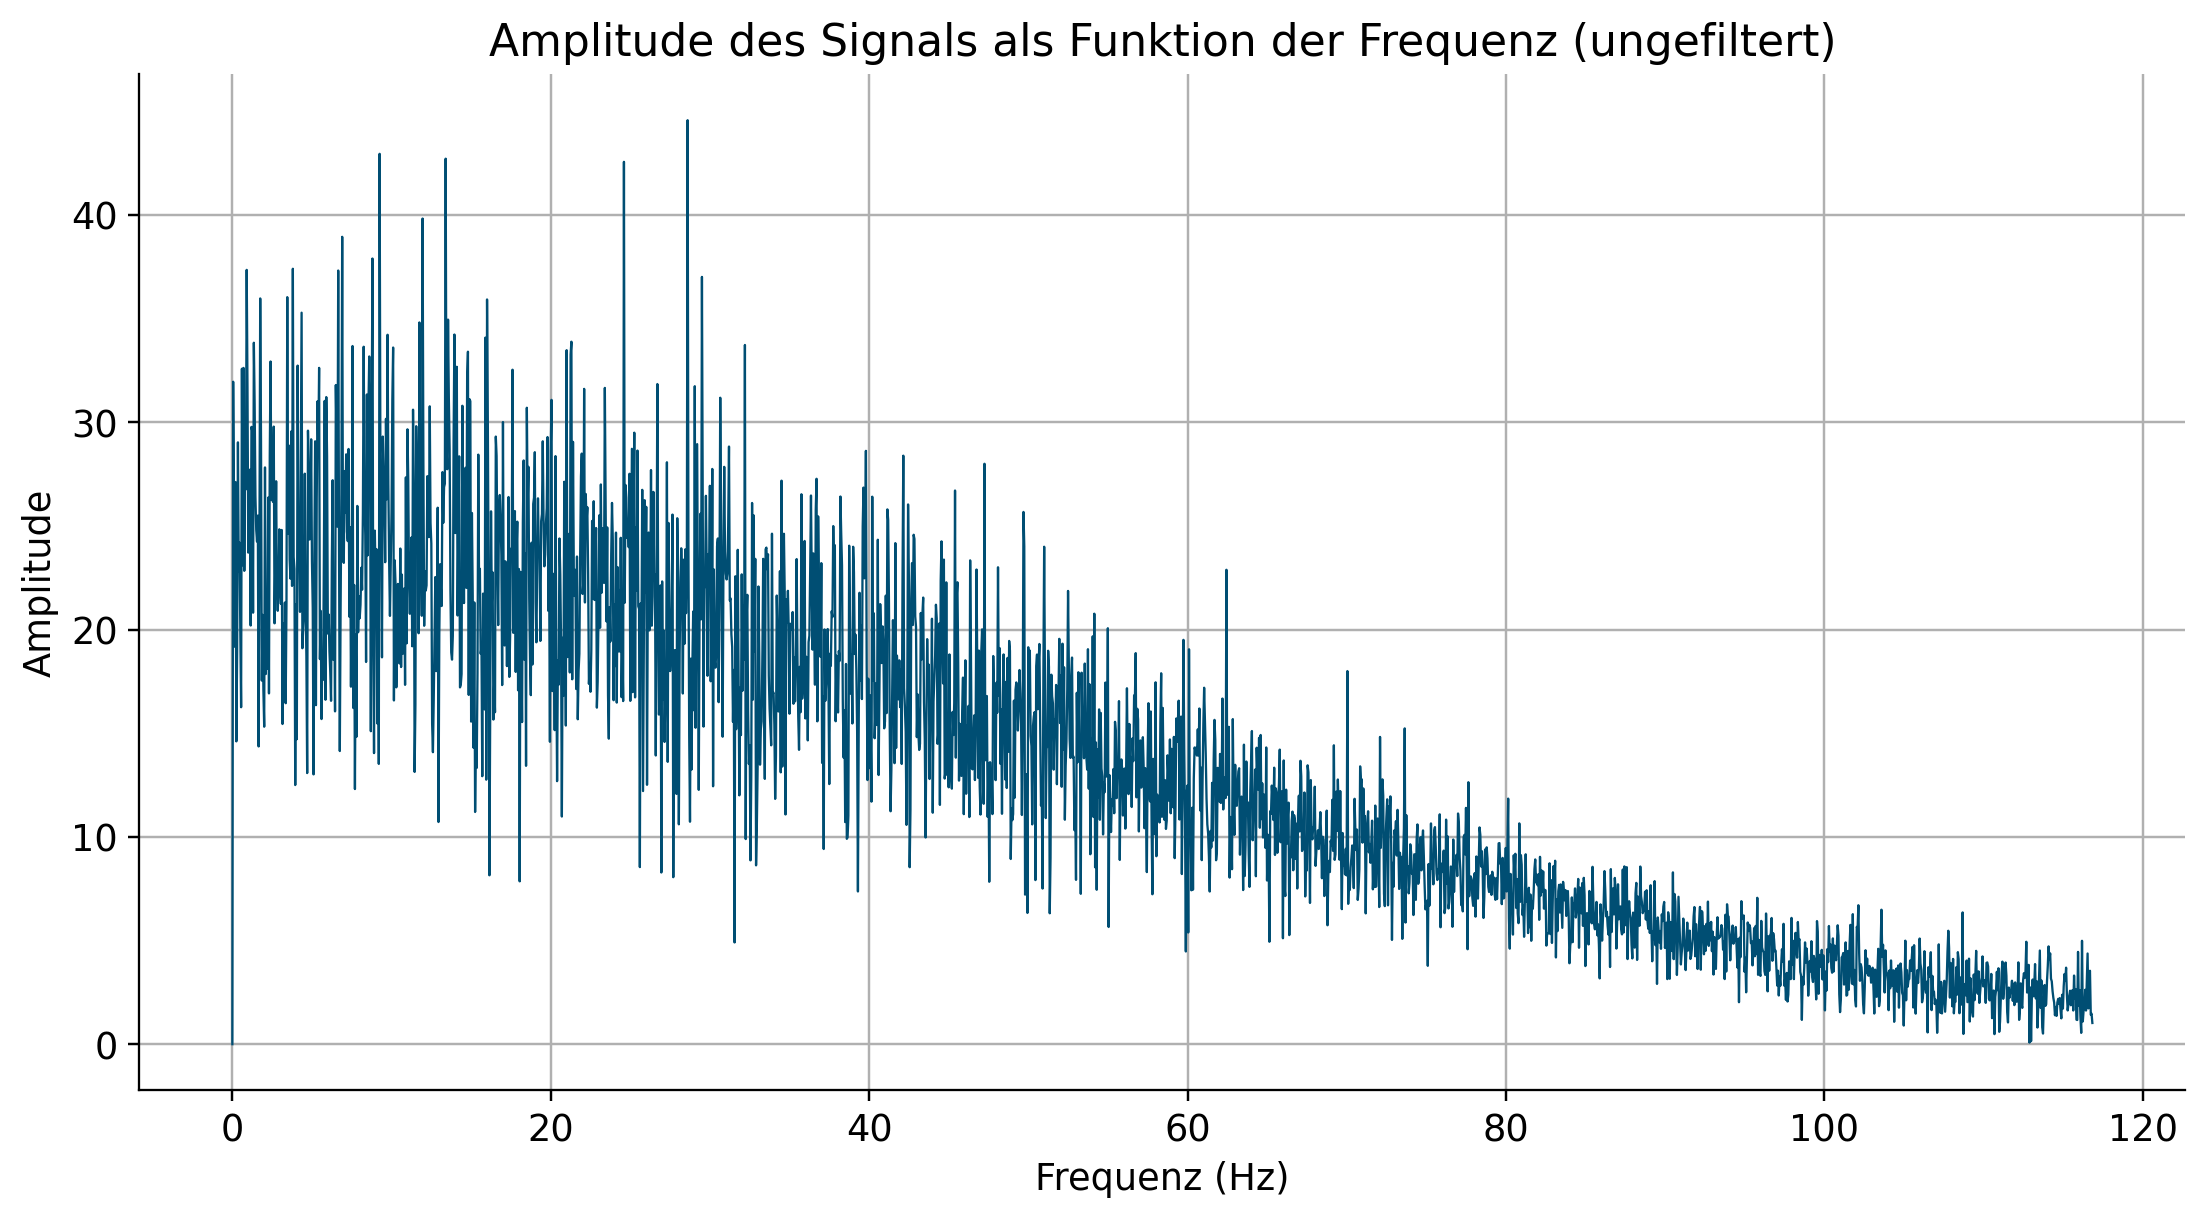

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

# Aufruf der my_fft-Funktion
amplitude, frequency = my_fft(interpolated_data, new_time)


# Plot der Amplitude als Funktion der Frequenz (ungefiltert)
plt.figure(figsize=(12, 6))
plt.plot(frequency, amplitude)
plt.title('Amplitude des Signals als Funktion der Frequenz (ungefiltert)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Da ich zunächst die Schwierigkeit eines fehlerhaften Plots an dieser Stelle hatte, habe ich einen weiteren Plot-Befehl,
### der nur Frequenzen oberhalb einer Grenzfrequenz von 1 Hz anzeigt, eingesetzt. Diesen kann ich vielleicht noch später
### nutzen.

# Plot der Amplitude als Funktion der Frequenz (gefiltert)
#plt.figure(figsize=(12, 6))

# Filtern der Werte, die größer als 1 Hz sind
#filtered_amplitude = amplitude[frequency >= 1]
#filtered_frequencies = frequency[frequency >= 1]

#plt.plot(filtered_frequencies, filtered_amplitude, label='Raw Data')

#plt.title('Amplitude des Signals als Funktion der Frequenz (über 1 Hz)')
#plt.xlabel('Frequenz (Hz)')
#plt.ylabel('Amplitude')
#plt.legend()
#plt.grid(True)
#plt.show()


# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="images/versuch2.jpg" width="500">

- Beschreibung des Aufbaus: -der Beschleunigungssensor wurde mittels Klebestreifen auf einer Massage-Pistole fixiert
                            
- Vorgangsbeschreibung: -die Pistole wurde gestartet
                        -die Messung nahm 20 Sekunden die Beschleunigungen des Sensors auf 
                        -während der Messung wurden die einzelnen Vibrations-Modi der Pistole durchgeschaltet (für einen kleinen Zeitraum stand diese still)

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
#Pfad zu Messdaten und Zuweisung der HDF5-Datei zu einer Variablen 
path_measurement_folder = "measurement_data/data_20240111_174934_VincentJestaedt_massage_gun" 
h5_file_name = "data_20240111_174934_VincentJestaedt_massage_gun.h5" 

(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240111_174934_VincentJestaedt_massage_gun/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240111_174934_VincentJestaedt_massage_gun/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240111_174934_VincentJestaedt_massage_gun/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeb09fb-9dff-68df-bb98-6f8a9a293688": {
    "type": "probe",
    "name": "massage_gun",
    "comment": "",
   

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
# Vollständigen Pfad zur HDF5-Datei erstellen
h5_file_path = os.path.join(path_measurement_folder, h5_file_name)
    
    
# UUID des Beschleunigungssensors
acceleration_sensor_uuid = '1ee847be-fddd-6ee4-892a-68c4555b0981'

# Öffnen der HDF5-Datei im Lese-Modus
with h5py.File(h5_file_path, 'r') as hdf_file:
    # Überprüfen, ob die UUID des Sensors vorhanden ist
    if acceleration_sensor_uuid in hdf_file:
        # Zugriff auf die Sensorgruppe
        sensor_group = hdf_file[acceleration_sensor_uuid]

        # Auslesen der Datenreihen
        acceleration_x = np.array(sensor_group['acceleration_x'])
        acceleration_y = np.array(sensor_group['acceleration_y'])
        acceleration_z = np.array(sensor_group['acceleration_z'])
        timestamp = np.array(sensor_group['timestamp'])
        print("Auslese erfolgreich")
    else:
        print("Auslese nicht erfolgreich")
        
# Anzeigen der Arrays
print("Beschleunigung X:")
print(acceleration_x)

print("Beschleunigung Y:")
print(acceleration_y)

print("Beschleunigung Z:")
print(acceleration_z)

print("Zeitstempel:")
print(timestamp)


Auslese erfolgreich
Beschleunigung X:
[ 0.         0.        -3.2950344 ... -3.726527  -3.726527  -3.726527 ]
Beschleunigung Y:
[ 0.         0.        -5.295591  ... -3.0204482 -3.0204482  4.1972462]
Beschleunigung Z:
[ 0.         0.        10.8657682 ... 12.7094184 12.7094184 12.160246 ]
Zeitstempel:
[3.51810455e-03 8.23235512e-03 1.24721527e-02 ... 1.99923255e+01
 1.99962656e+01 2.00001855e+01]


#### 2. Betrag der Beschleunigung berechnen


In [11]:
vec_am = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten

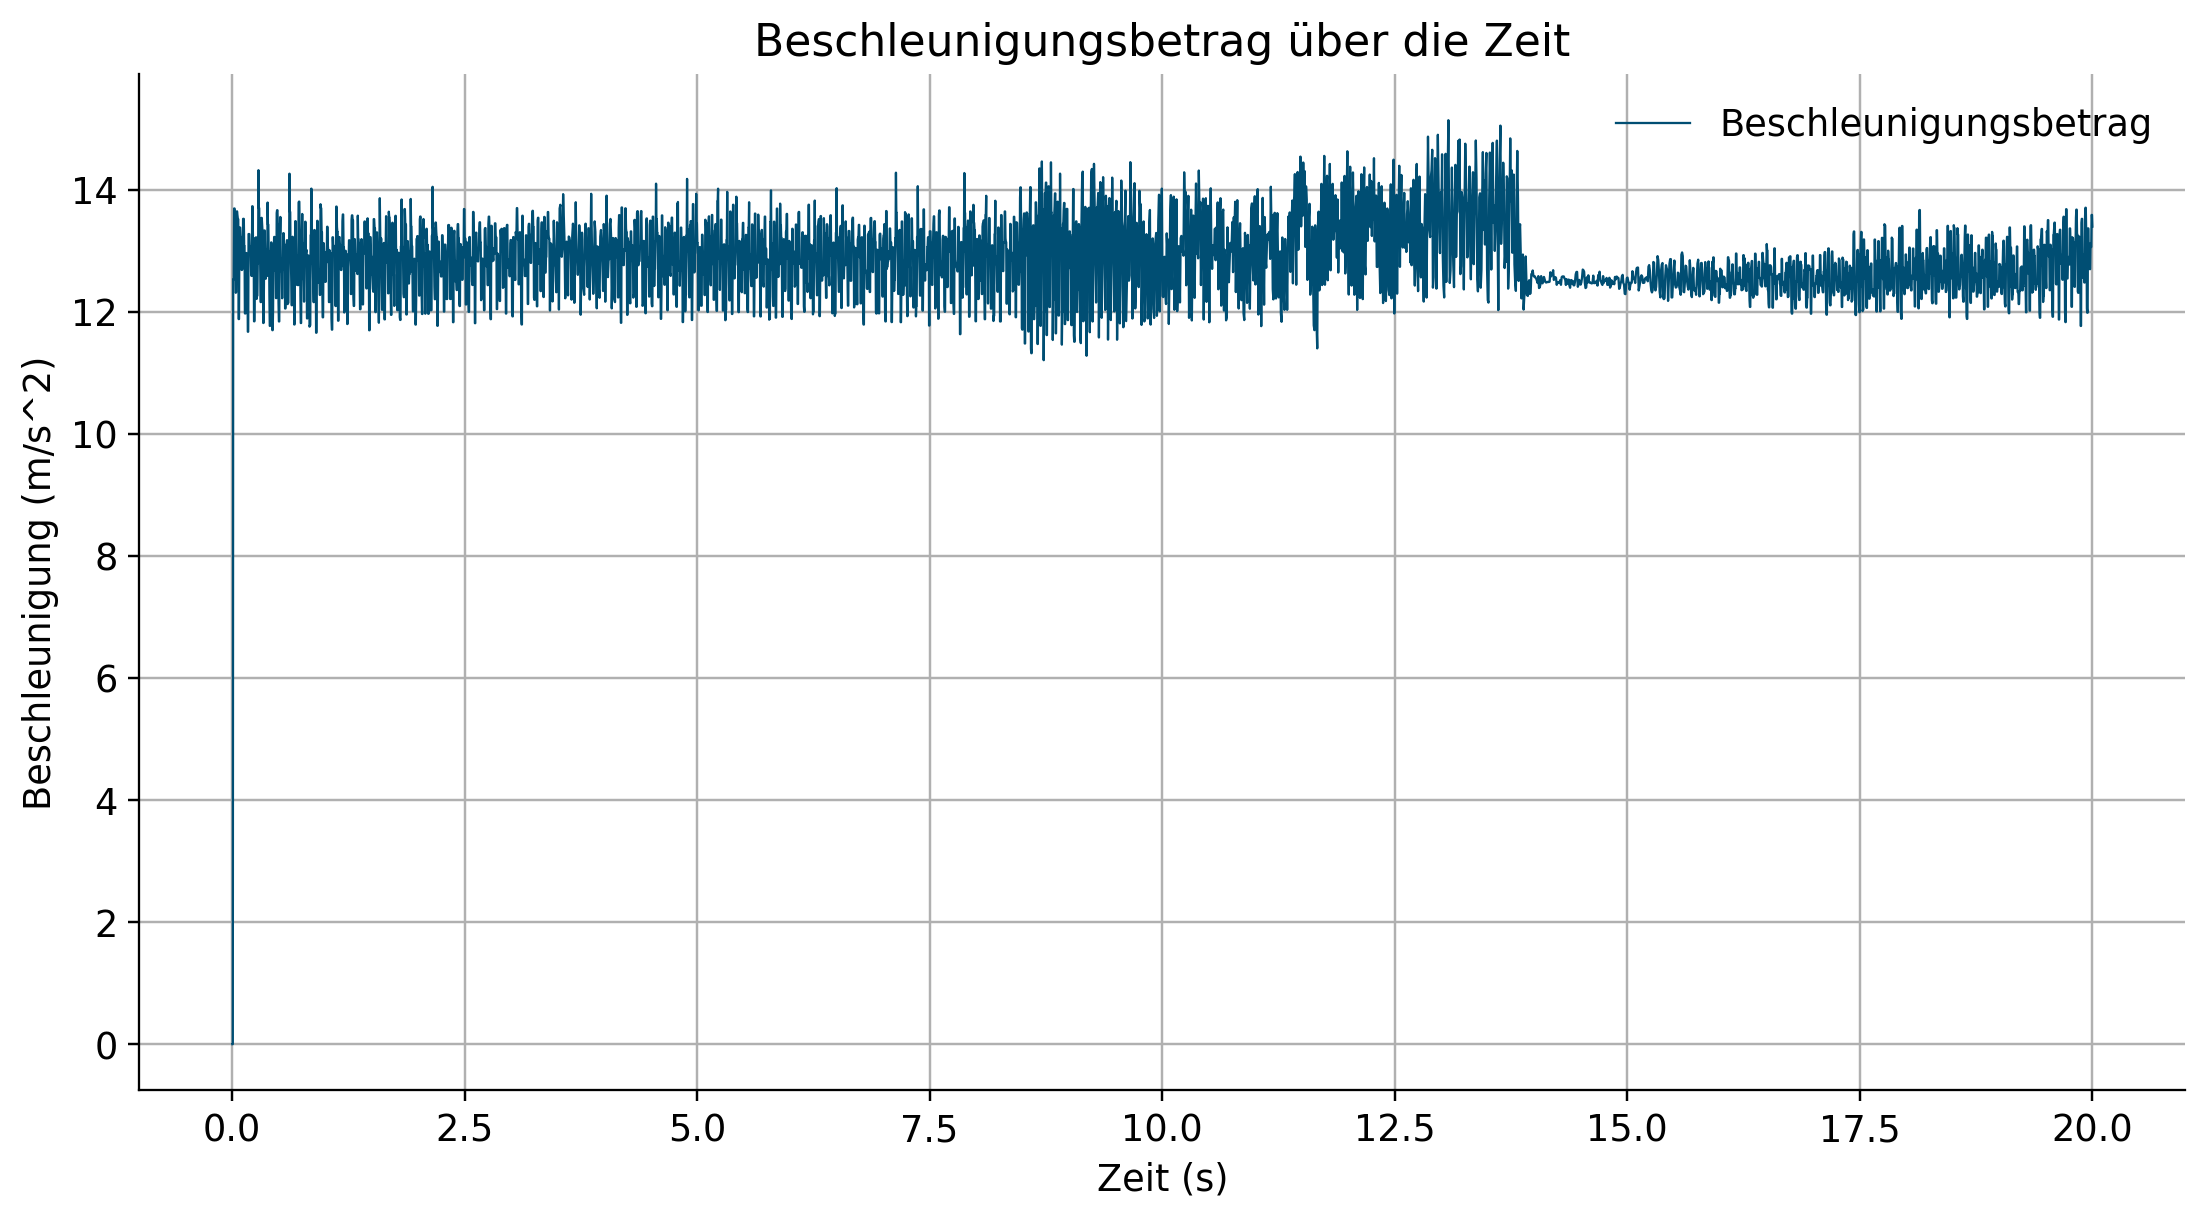

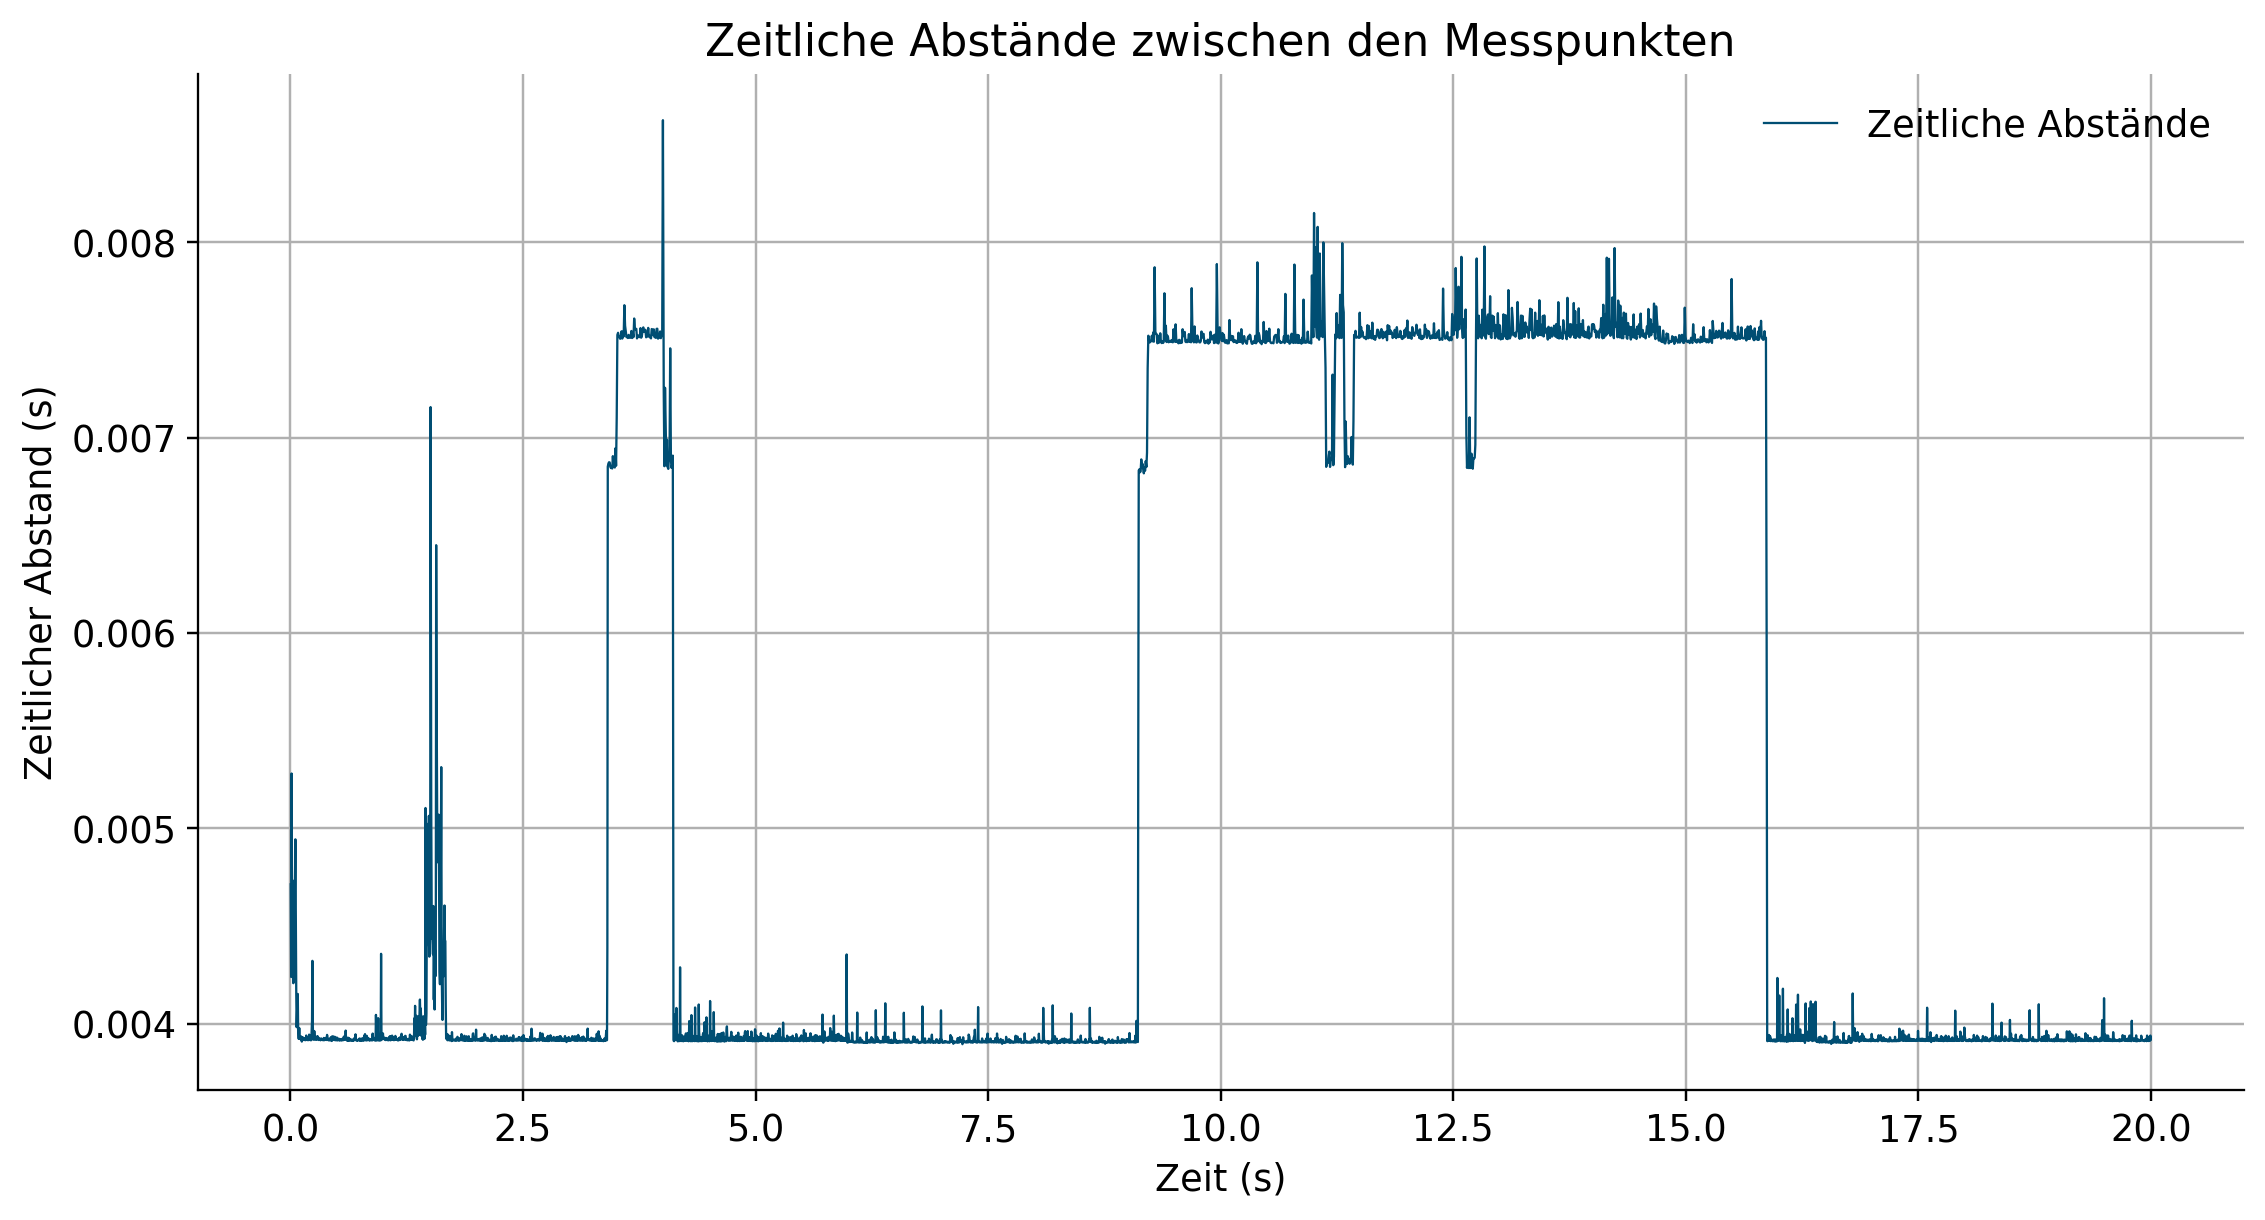

In [12]:
# Berechnen der zeitlichen Abstände zwischen den Messpunkten
time_intervals = np.diff(timestamp)

# Plot der Beträge der Beschleunigung über die Zeit
plt.figure(figsize=(12, 6))
plt.plot(timestamp, vec_am, label='Beschleunigungsbetrag')
plt.title('Beschleunigungsbetrag über die Zeit')
plt.xlabel('Zeit (s)')
plt.ylabel('Beschleunigung (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

# Plot der zeitlichen Abstände zwischen den Messpunkten
plt.figure(figsize=(12, 6))
plt.plot(timestamp[:-1], time_intervals, label='Zeitliche Abstände')
plt.title('Zeitliche Abstände zwischen den Messpunkten')
plt.xlabel('Zeit (s)')
plt.ylabel('Zeitlicher Abstand (s)')
plt.legend()
plt.grid(True)
plt.show()

#### 4. Interpolation der Messwerte



Interpolierte Daten:
[ 0.          0.19902876 12.52858549 ... 13.35544592 13.58452895
 13.39311248]


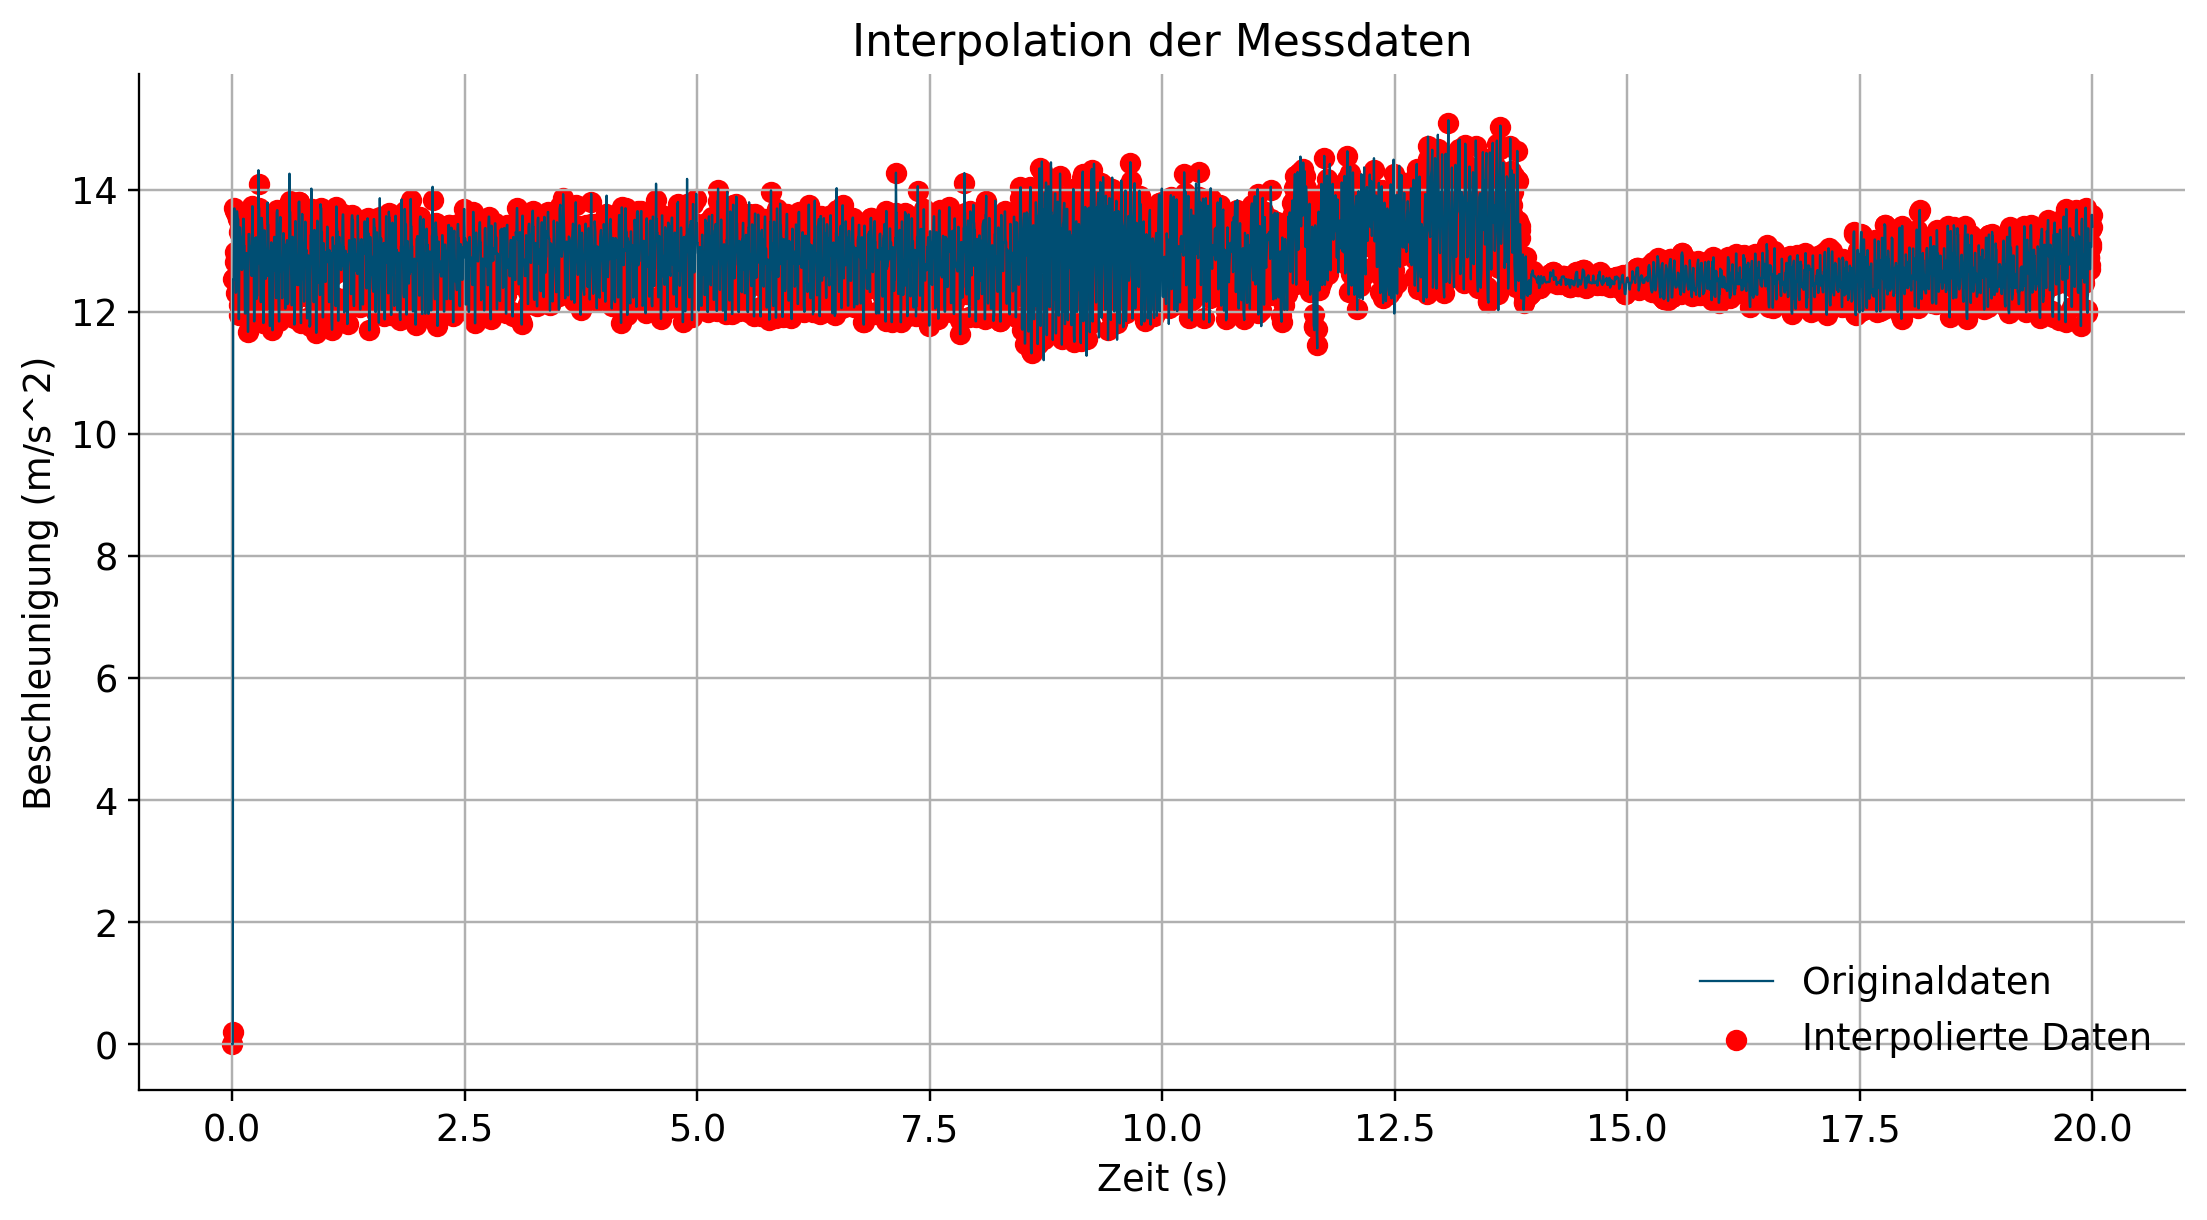

In [13]:
# Aufruf der interpolation-Funktion
new_time, interpolated_data = interpolation(timestamp, vec_am)

# Ausgabe der interpolierten Daten
print("Interpolierte Daten:")
print(interpolated_data)

# Plot der Originaldaten
plt.figure(figsize=(12, 6))
plt.plot(timestamp, vec_am, label='Originaldaten')
plt.scatter(new_time, interpolated_data, color='red', label='Interpolierte Daten')
plt.title('Interpolation der Messdaten')
plt.xlabel('Zeit (s)')
plt.ylabel('Beschleunigung (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

#### 5 & 6. FFT durchführen und graphisch darstellen


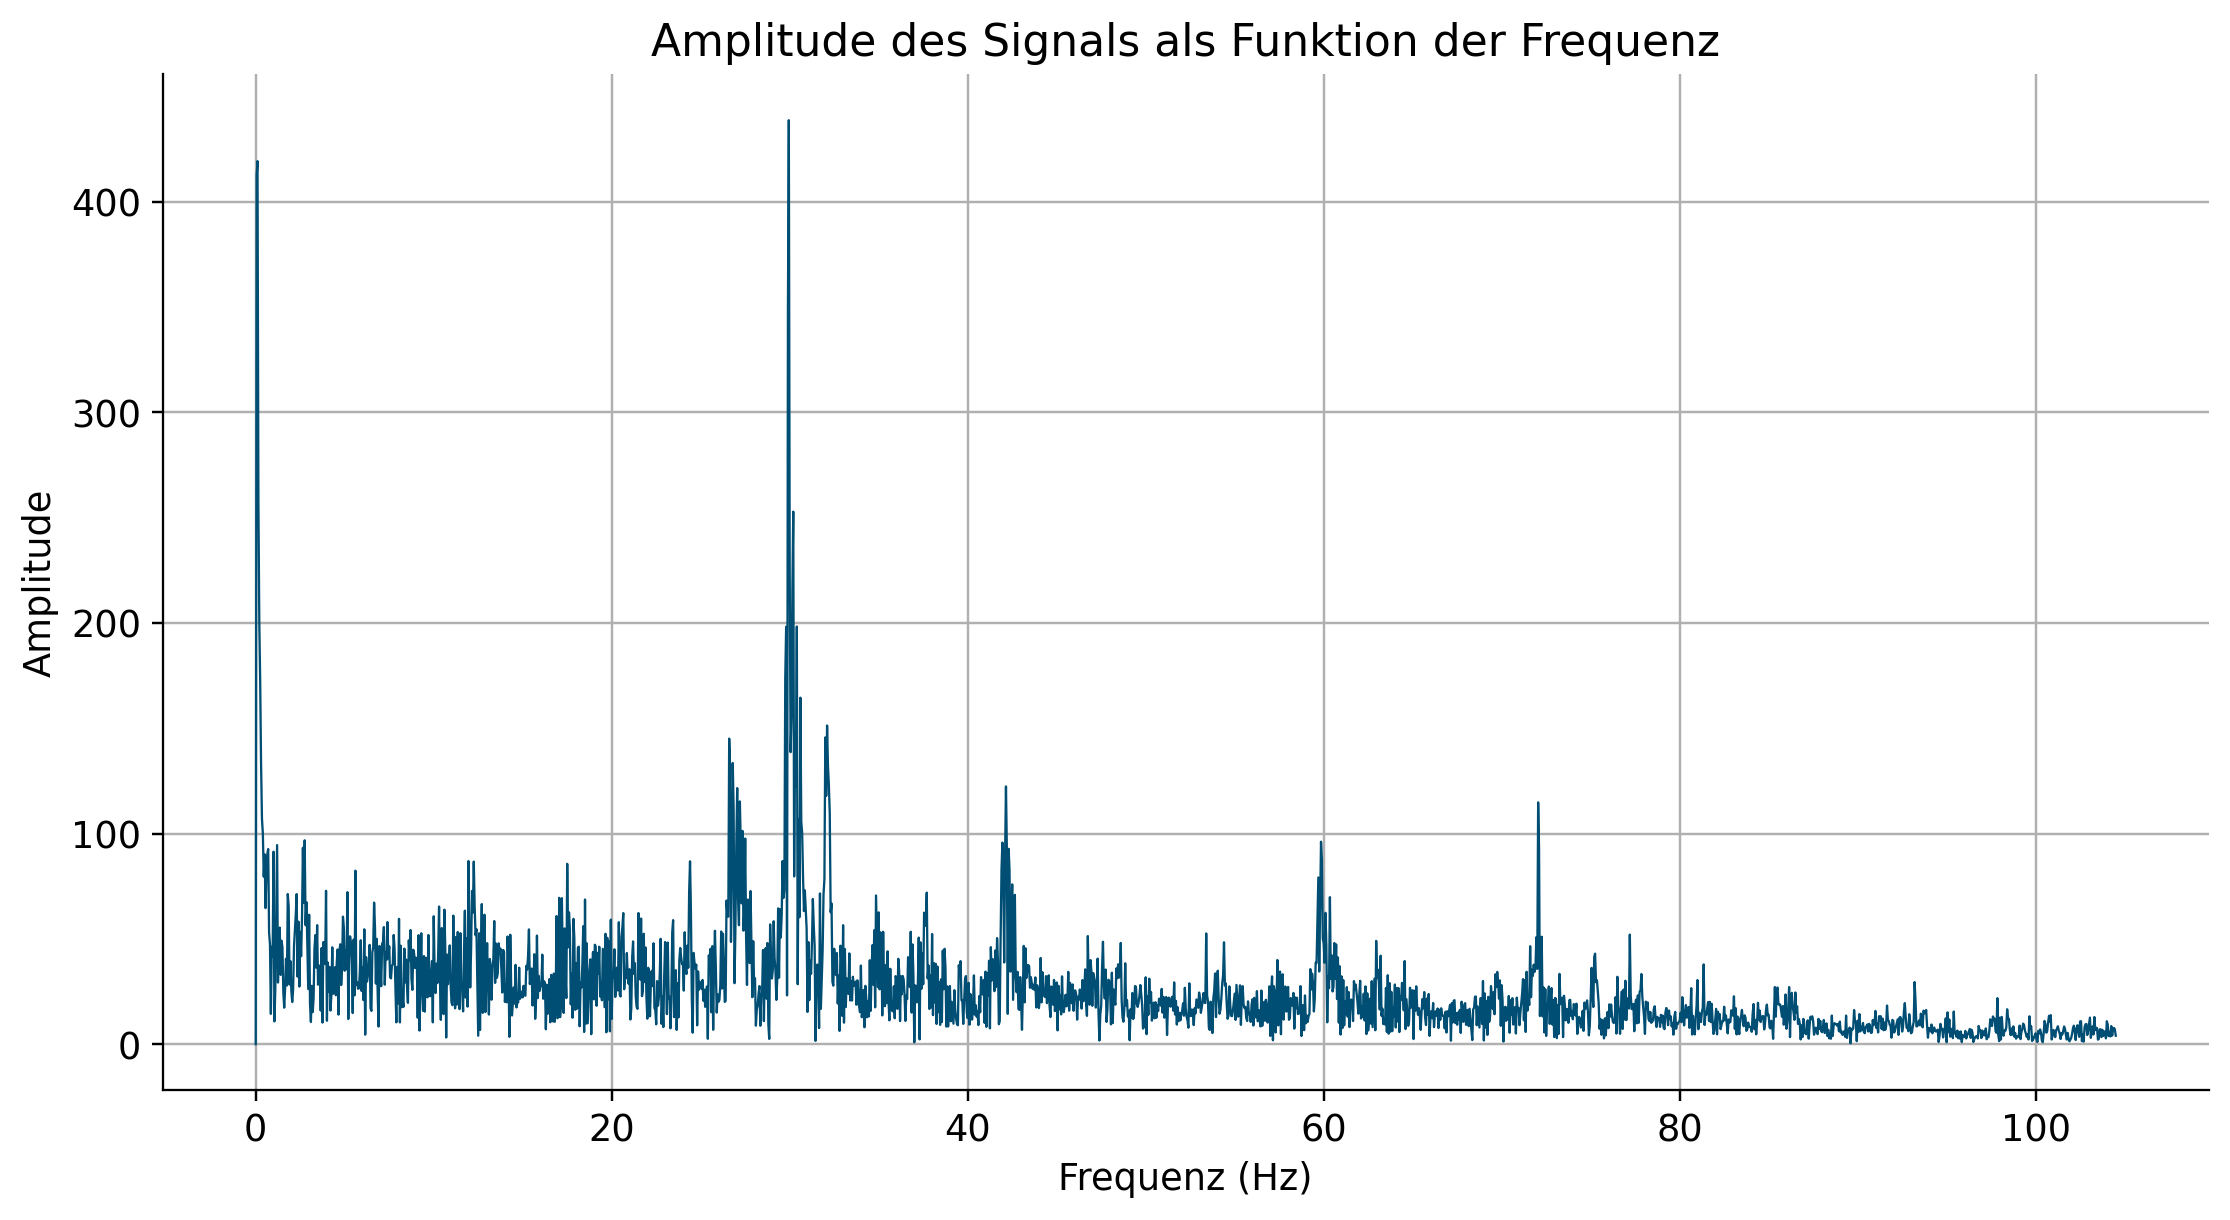

In [16]:
# Aufruf der my_fft-Funktion
amplitude, frequency = my_fft(interpolated_data, new_time)

# Plot der Amplitude als Funktion der Frequenz
plt.figure(figsize=(12, 6))
plt.plot(frequency, amplitude)
plt.title('Amplitude des Signals als Funktion der Frequenz')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Hier ebenso der gefilterte Plot-Befehl 

# Plot der Amplitude als Funktion der Frequenz
#plt.figure(figsize=(12, 6))

# Filtern der Werte, die größer als 1 Hz sind
#filtered_amplitude = amplitude[frequency >= 1]
#filtered_frequencies = frequency[frequency >= 1]

#plt.plot(filtered_frequencies, filtered_amplitude, label='Raw Data')

#plt.title('Amplitude des Signals als Funktion der Frequenz (über 1 Hz)')
#plt.xlabel('Frequenz (Hz)')
#plt.ylabel('Amplitude')
#plt.legend()
#plt.grid(True)
#plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Es ist zu erkennen das teilweise die zeitlichen Abstände der Messungen stark variieren. Dieser Abstand wurde in acceleration_measurement.py zu einer Milli-Sekunde gesetzt. Der Durchschnitt liegt aber in der tatsächlichen Messung bei 4 ms. Jedoch steigt diese Zeit beim ersten Versuch auf 11 ms. Selbst im Zweiten Versuch, bei dem ab 13,75 ms die Massage-Pistole für 1,5 Sekunden still stand, ist ein zeitlicher Abstand von 7,5 ms festzustellen. Diese unregelmäßige Abtastrate kann zu Aliasing-Effekten, Interpolationsfehlern und Schwierigkeiten der Frequenzanalyse führen. 

Weiterhin ist zu sagen, dass die Fixierung des Sensors auf den Testobjekten mittels eines Klebestreifens vollzogen wurde. Dieser kann einen dämpfenden Charakter aufweisen und die Messung beeinflussen. 

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Meiner Meinung nach ist der Versuch geglückt,da beide Forschungsfragen beantwortet werden konnten. Jedoch muss ich zugeben, dass das große Frequenzspektrum der Musikbox-Analyse mich irritiert. Eine mögliche Erkärung dafür könnte sein, dass eine Musikanlage dafür konzipiert wurde ein möglichst großes Frequenz- und somit Tonsprektrum abzugeben. Doch ich hatte bei monotoner Musik wie Techno etwas anderes erwartet. 